# Gerardo de Miguel González

## Práctica 1 de Estadística para Data Science

### Problema 1

*Considera  los  datos  de  la  liga  NBA  de  baloncesto  profesional  de  la  temporada 2014-2015 que figuran en el archivo players stats.csv.*

::GMG::Carga de datos CSV en un Dataframe, obtención de la descripción del conjunto de datos y visualización de una muestra de los mismos.

In [1]:
players<-read.csv('players_stats.csv')
print(paste(class(players),'with',ncol(players),'columns and',nrow(players),'rows.'))
print('Description:')
str(players)

[1] "data.frame with 34 columns and 490 rows."
[1] "Description:"
'data.frame':	490 obs. of  34 variables:
 $ Name        : Factor w/ 490 levels "Aaron Brooks",..: 4 1 2 3 12 13 5 6 9 10 ...
 $ Games.Played: int  26 82 47 32 76 65 74 27 5 69 ...
 $ MIN         : int  324 1885 797 740 2318 1992 1744 899 14 1518 ...
 $ PTS         : int  133 954 243 213 1156 1082 545 374 4 432 ...
 $ FGM         : int  51 344 93 91 519 486 195 121 1 179 ...
 $ FGA         : int  137 817 208 220 965 1010 440 300 4 353 ...
 $ FG.         : num  37.2 42.1 44.7 41.4 53.8 48.1 44.3 40.3 25 50.7 ...
 $ X3PM        : int  15 121 13 1 11 2 73 26 0 1 ...
 $ X3PA        : int  57 313 48 9 36 5 210 68 0 3 ...
 $ X3P.        : num  26.3 38.7 27.1 11.1 30.6 40 34.8 38.2 0 33.3 ...
 $ FTM         : int  16 145 44 30 107 108 82 106 2 73 ...
 $ FTA         : int  24 174 61 46 141 165 101 129 2 104 ...
 $ FT.         : num  66.7 83.3 72.1 65.2 75.9 65.5 81.2 82.2 100 70.2 ...
 $ OREB        : int  6 32 46 48 131 99 31 19

In [2]:
print('Muestra del dataset:')
head(players)

[1] "Muestra del dataset:"


Name,Games.Played,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,X3P.,⋯,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
AJ Price,26,324,133,51,137,37.2,15,57,26.3,⋯,29,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.79839
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,⋯,30,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.36111
Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,⋯,20,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.14266
Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,⋯,24,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.37775
Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,⋯,29,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.23438
Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,⋯,30,us,"January 4, 1985",,10,205.0,C,CHA,130.05,30.94587


*i) Representa gráficamente las datos de la columna Height de forma que se aprecie la distribución de los datos.*

::GMG::Altura es una serie de datos cuantitativos de tipo continuo y escala (de medida) razón en cm.

 - ver [Fundamentals of Statistics 1: Basic Concepts :: Nominal, Ordinal, Interval and Ratio](http://www.usablestats.com/lessons/noir)

In [3]:
alturas<-players$Height
print(paste(class(alturas),'with',length(alturas),'elements.'))
print('Description:')
str(alturas)

[1] "numeric with 490 elements."
[1] "Description:"
 num [1:490] 185 180 202 205 205 ...


::GMG::Hay que tener cuidado porque los datos tienen valores no asignados (NA) ...

 - ver [Stackoverflow: Fastest way to detect if vector has at least 1 NA?](https://stackoverflow.com/questions/6551825/fastest-way-to-detect-if-vector-has-at-least-1-na)

In [4]:
if (anyNA(alturas)) {
   print("::GMG::¡Cuidado, 'alturas' tiene valores faltantes!")
} else {
   print("::GMG::Tranquilo, no hay valores faltantes en 'alturas'")
}

[1] "::GMG::¡Cuidado, 'alturas' tiene valores faltantes!"


::GMG::Representación de una *variable estadística cuantitativa continua* en un **histograma** con intervalos de tamaño constante (intervals o bins) con longitud de columna del intervalo *proporcional* a la frecuencia de datos que caen dentro del intervalo en cuestión.

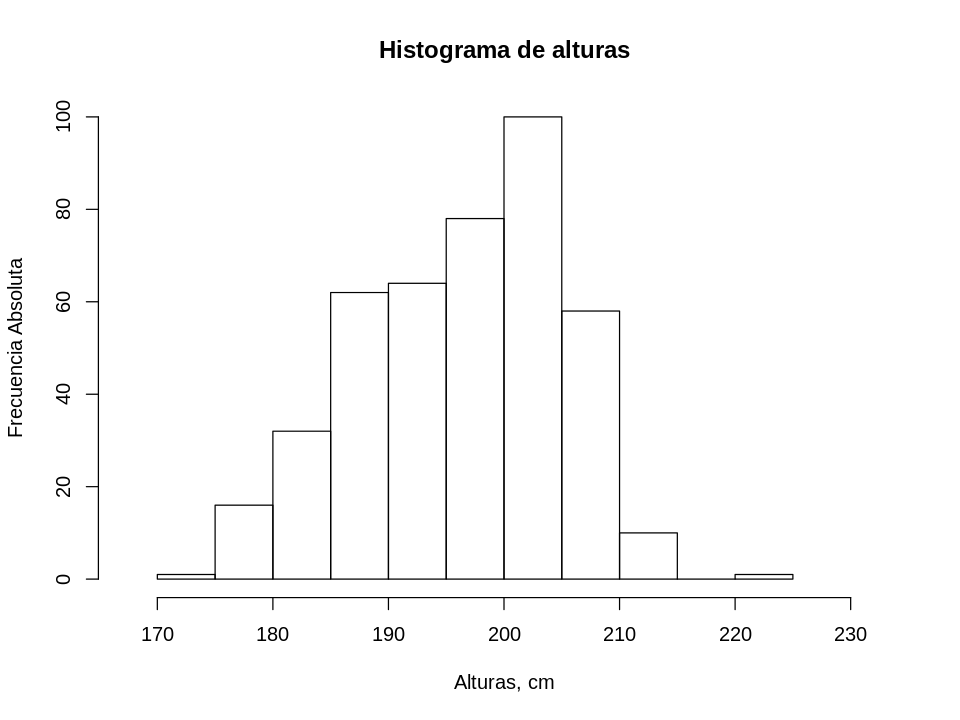

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
histinfo<-hist(alturas, 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia Absoluta",
          main="Histograma de alturas")

::GMG::NOTA::Sobre el tamaño de las figuras (en algunos entornos las figuras se representan muy pequeñas, p.e. en Azure Notebooks....)

 - [Blog Revolutions: Resizing plots in the R kernel for Jupyter notebooks](https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html)

::GMG::Cabe preguntarse cuál es el **número óptimo de intervalos** que hay que poner en el histograma para representar "*adecuadamente*" la distribución de los datos de forma que se "*aprecie*" su distribución (i.e sin que haya pérdida de información ...). Lo hace la función `hist` es determinar los puntos de corte de los intervalos (breaks) de forma automática:

In [6]:
print(histinfo)

$breaks
 [1] 170 175 180 185 190 195 200 205 210 215 220 225

$counts
 [1]   1  16  32  62  64  78 100  58  10   0   1

$density
 [1] 0.0004739336 0.0075829384 0.0151658768 0.0293838863 0.0303317536
 [6] 0.0369668246 0.0473933649 0.0274881517 0.0047393365 0.0000000000
[11] 0.0004739336

$mids
 [1] 172.5 177.5 182.5 187.5 192.5 197.5 202.5 207.5 212.5 217.5 222.5

$xname
[1] "alturas"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [7]:
print(paste('Número de intervalos:',length(histinfo$breaks)-1))

[1] "Número de intervalos: 11"


::GMG::Voy a representar el histograma con menos y más bins, para ver cuál es el efecto ...

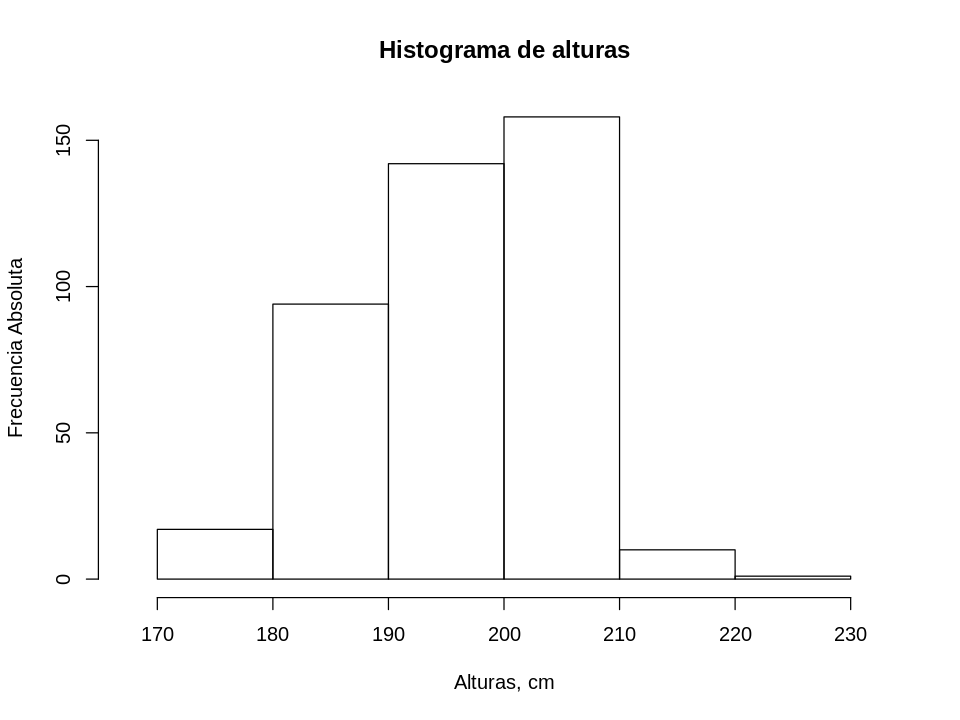

In [10]:
#options(repr.plot.width=8, repr.plot.height=6)
hist(alturas, 
          breaks = 5, 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia Absoluta",
          main="Histograma de alturas")

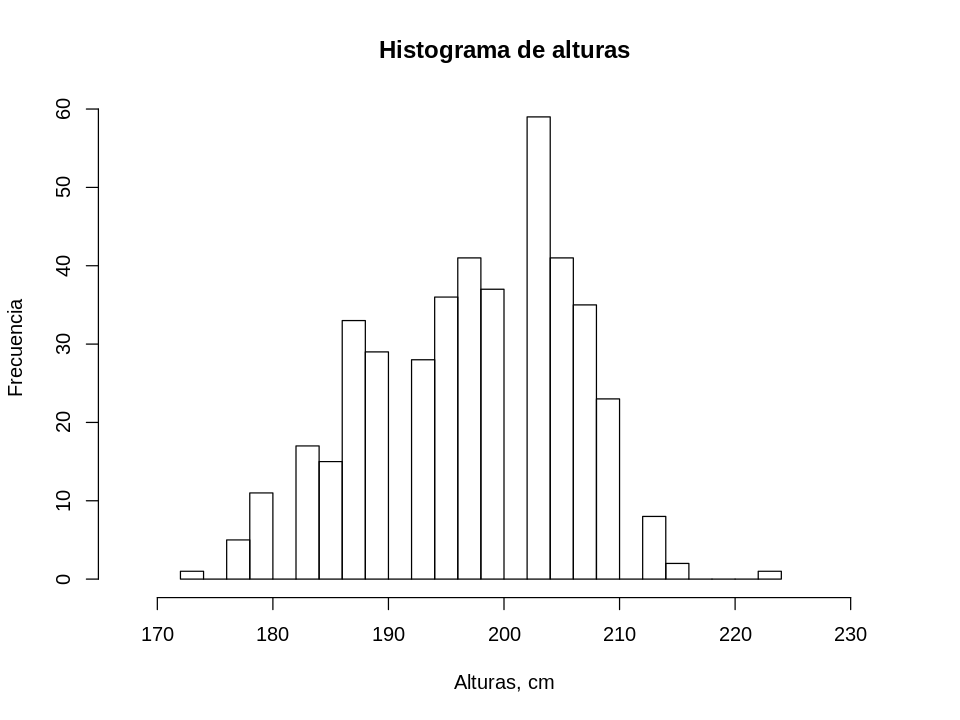

In [11]:
options(repr.plot.width=8, repr.plot.height=6)
hist(alturas, 
          breaks = 20, 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia",
          main="Histograma de alturas")

::GMG::He consultado a Google y he encontrado dos referencias:
 
 - [stats stackexchange (Cross Validated): Calculating optimal number of bins in a histogram](https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram)

> The Freedman-Diaconis rule is very robust and works well in practice. The bin-width is set to 
> h=2×IQR×n−1/3. So the number of bins is (max−min)/h, where n is the number of observations, 
> max is the maximum value and min is the minimum value.
> In base R, you can use:
> `hist(x, breaks="FD")`

- [Planspace: How does R calculate histogram break points?](https://planspace.org/20141225-how_does_r_calculate_histogram_break_points/)
 
 

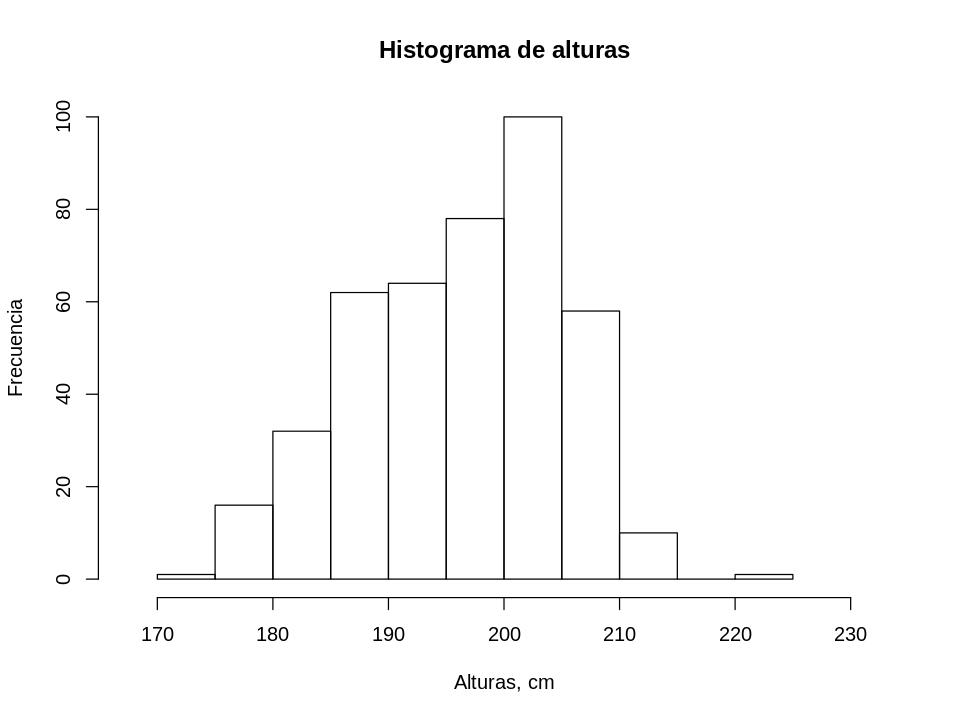

In [12]:
#options(repr.plot.width=8, repr.plot.height=6)
histinfo<-hist(alturas, 
          breaks = "FD", 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia",
          main="Histograma de alturas")

In [13]:
print(paste('Número de intervalos:',length(histinfo$breaks)-1))

[1] "Número de intervalos: 11"


*ii) Calcula la media muestral y represéntala mediante una línea en la gráfica.*

::GMG::Media muestral es `mean()`

 - ver [R Documentation: mean](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/mean)

In [15]:
altura_m <- mean(alturas, na.rm = TRUE)
print(paste('Media muestral:',round(altura_m,digits = 3)))

[1] "Media muestral: 197.441"


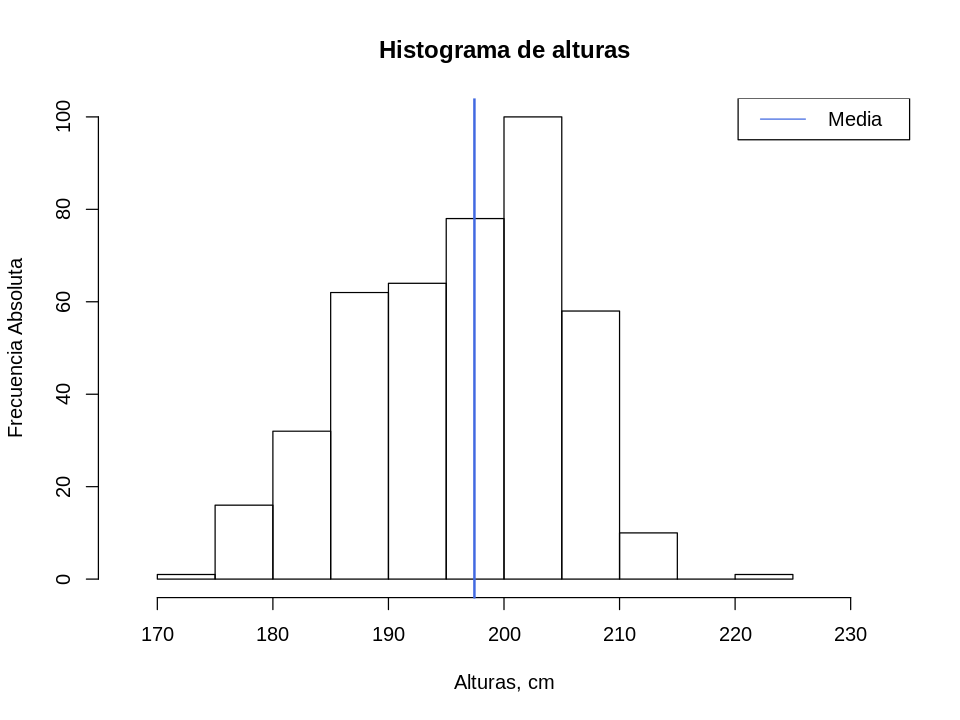

In [17]:
#options(repr.plot.width=8, repr.plot.height=6)
hist(alturas, 
          breaks = "FD", 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia Absoluta",
          main="Histograma de alturas")
abline(v = altura_m, col = "royalblue", lwd = 2)
legend(x = "topright", # location of legend within plot area
 c("Media"),
 col = c("royalblue"),
 lwd = c(1, 2))

*iii)  Calcula la desviación típica muestral y representa el intervalo media muestral ± desviación típica muestral en la gráfica.*

::GMG::La desviación estándar es `sd()`

 - ver [R Documentation](https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/sd)

In [18]:
altura_sd <- sd(alturas, na.rm = TRUE)
print(round(altura_sd,digits = 3))

[1] 8.74


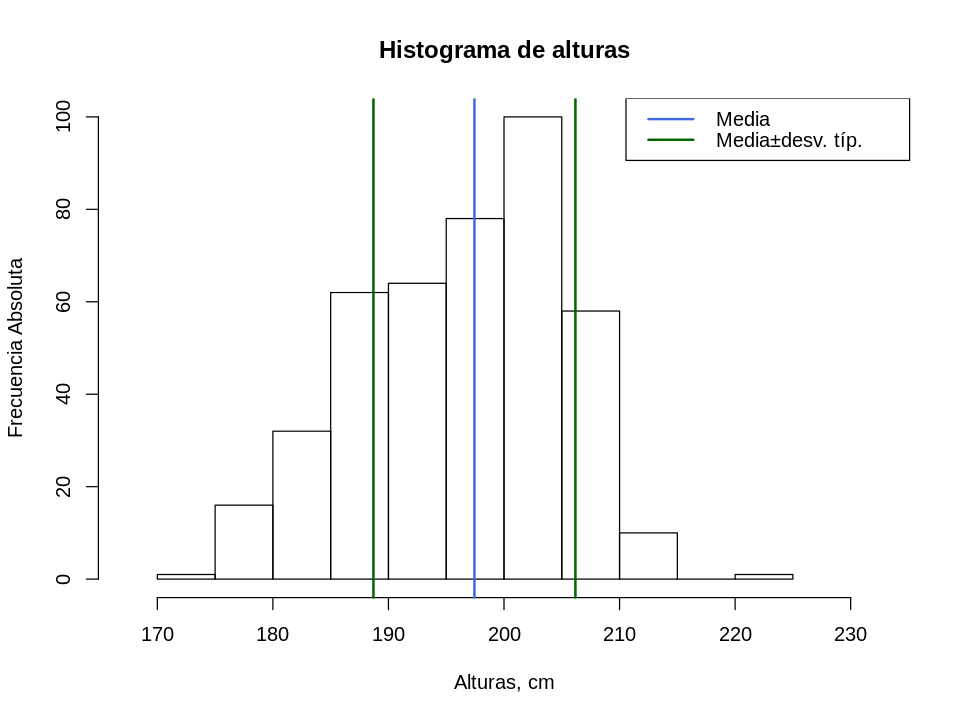

In [20]:
#options(repr.plot.width=8, repr.plot.height=6)
hist(alturas, 
          breaks = "FD", 
          xlim = c(min(alturas, na.rm = TRUE) - 5,max(alturas, na.rm = TRUE) + 10),
          xlab = "Alturas, cm",
          ylab = "Frecuencia Absoluta",
          main="Histograma de alturas")
abline(v = altura_m, col = "royalblue", lwd = 2)
abline(v = altura_m - altura_sd, col = "darkgreen", lwd = 2)
abline(v = altura_m + altura_sd, col = "darkgreen", lwd = 2)
legend(x = "topright", # location of legend within plot area
 c("Media","Media±desv. típ."),
 col = c("royalblue", "darkgreen"),
 lwd = c(2, 2))

iv) Comenta brevemente la gráfica.

::GMG:: El histograma es asimétrico con la parte izquierda (cola de la izquerda) más pesada. Dado que el baloncesto es un "deporte de altura" existe una moda de jugadores altos más grande que la media.


### Problema 2

Descarga los datos de extensión de hielo ártico del directorio:

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/

en concreto:

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

i) Carga los datos en R. Recomendacion: Elimina la segunda línea del archivo.

In [1]:
headers = read.csv(file = url(
  "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
                   ), 
                   skip = 0, 
                   header = FALSE, 
                   nrows = 1, 
                   as.is = TRUE,
                   strip.white = TRUE)

In [2]:
noaa.sea.ice <- read.csv(
  file = url(
    "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
  ),
  skip = 2, 
  header = FALSE)

In [3]:
colnames(noaa.sea.ice)= headers

In [4]:
str(noaa.sea.ice)

'data.frame':	13016 obs. of  6 variables:
 $ Year       : int  1978 1978 1978 1978 1978 1978 1978 1978 1978 1978 ...
 $ Month      : int  10 10 10 11 11 11 11 11 11 11 ...
 $ Day        : int  26 28 30 1 3 5 7 9 11 13 ...
 $ Extent     : num  10.2 10.4 10.6 10.7 10.8 ...
 $ Missing    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Source Data: Factor w/ 13016 levels " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978102"| __truncated__,..: 1 2 3 4 5 6 7 8 9 10 ...


In [5]:
#::GMG::Me interesan las cifras de extensión de hielo ártico que se encuentran en 'Extent'
#       por día desde el año 1978 hasta hoy.
#       Las unidades de esas cifras son millones de kilómetros cuadrados (10^6 sq km)
head(noaa.sea.ice$Extent)

[1] 10.231 10.420 10.557 10.670 10.777 10.968

ii) Averigua en qué meses suelen ser las extensiones máximas y mínimas.

In [19]:
ext.max <- aggregate(Extent~Month, data=noaa.sea.ice, max)
ext.max

Month,Extent
1,15.912
2,16.579
3,16.635
4,15.945
5,14.786
6,13.091
7,11.562
8,9.224
9,8.211
10,10.615


In [20]:
ext.min <- aggregate(Extent~Month, data=noaa.sea.ice, min)
ext.min

Month,Extent
1,12.491
2,13.741
3,14.120
4,12.933
5,11.132
6,9.231
7,6.368
8,3.648
9,3.340
10,4.112


In [24]:
mes <- c('Enero','Febrero','Marzo','Abril','Mayo','junio',
         'Julio','Agosto','Septiembre','Octubre','Noviembre',
         'Diciembre')

In [25]:
paste('El mes con mayor extensión del periodo 1978-2018 es',
      mes[which.max(ext.max$Extent)],
      'y el de menor extensión',mes[which.min(ext.min$Extent)])

[1] "El mes con mayor extensión del periodo 1978-2018 es Marzo y el de menor extensión Septiembre"

iii) Representa gráficamente los datos de extensión medianos de cada mes.

In [8]:
ext.median <- aggregate(Extent~Month, data=noaa.sea.ice, median)
ext.median

Month,Extent
1,14.2185
2,15.1730
3,15.2830
4,14.5130
5,13.0920
6,11.6300
7,9.1100
8,6.8725
9,6.1035
10,8.1490


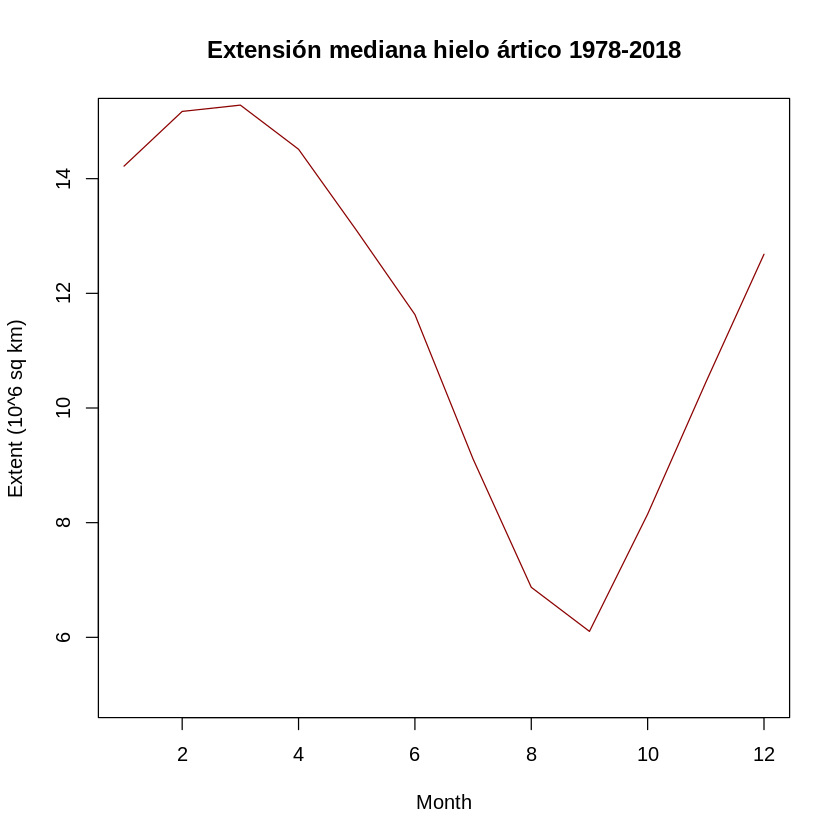

In [62]:
plot(ext.median, 
     type = 'l',
     xlim = c(1,12),
     ylim = c(5, round(max(ext.median))),
     xlab = 'Month',
     ylab = 'Extent (10^6 sq km)',
     col = 'darkred',
     main = 'Extensión mediana hielo ártico 1978-2018'
    )

iv) Añade una región sombreada correspondiente a los percentiles del 5% y 95% de cada mes.

In [29]:
#::GMG::Primero hay que calcular los percentiles (cuantiles p) del 5% (p = 0.05) y
#       95% (p = 0.95) de cada mes en el periodo 1978-2018
ext.percentil.5 <- aggregate(Extent~Month, data=noaa.sea.ice, quantile, 0.05)
ext.percentil.5

Month,Extent
1,13.11535
2,14.11800
3,14.30900
4,13.57140
5,12.08780
6,10.08700
7,7.06700
8,4.93975
9,4.25875
10,5.39540


In [30]:
ext.percentil.95 <- aggregate(Extent~Month, data=noaa.sea.ice, quantile, 0.95)
ext.percentil.95

Month,Extent
1,15.31660
2,15.97640
3,16.06900
4,15.49340
5,14.12315
6,12.65040
7,10.98000
8,8.40050
9,7.55715
10,9.83650


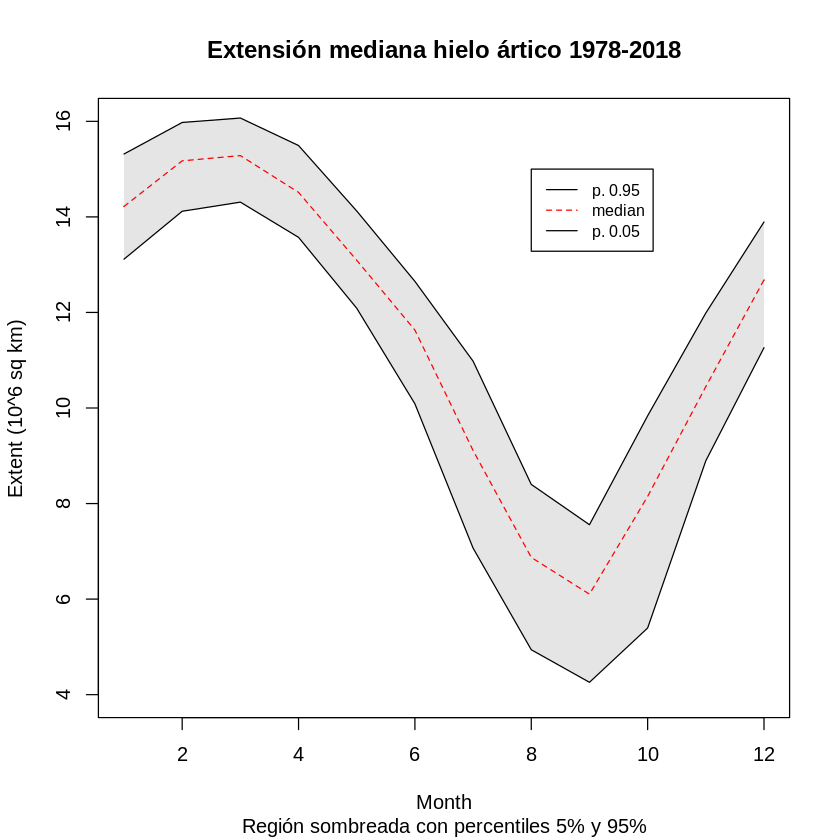

In [52]:
#::GMG::Ahora dibujamos la gráfica del apartado anterior con las nuevos valores calculados
#       en un polígono
plot(ext.median, 
     type = 'l',
     xlim = c(1,12),
     ylim = c(floor(min(ext.percentil.5$Extent)), 
              round(max(ext.percentil.95$Extent))),
     xlab = 'Month',
     ylab = 'Extent (10^6 sq km)',
     col = 'darkred',
     main = 'Extensión mediana hielo ártico 1978-2018',
     sub = 'Región sombreada con percentiles 5% y 95%'
    )
polygon(c(ext.median$Month, rev(ext.median$Month)), 
        c(ext.percentil.95$Extent, rev(ext.percentil.5$Extent)), 
        col = "grey90", 
        border = FALSE
       )
lines(ext.median$Month, ext.percentil.95$Extent, col = "black")
lines(ext.median$Month, ext.median$Extent, col = "red", lty = 'dashed')
lines(ext.median$Month, ext.percentil.5$Extent, col = "black")
legend(8, 15, legend=c("p. 0.95", "median", "p. 0.05"),
       col=c("black","red","black"), lty=1:2, cex=0.8)


v) Añade una línea correspondiente a los datos de 2018 y otra para los datos de 2012.

In [79]:
#::GMG::Ahora tenemos que seleccionar datos de valores medianos mensuales de dos años concretos
#       puedo obtener los valores diarios fácilmente con which y una condición por la columna Year
#ext.diaria.2012 <- noaa.sea.ice$Extent[which(x = noaa.sea.ice$Year == 2012)]
#ext.diaria.2018 <- noaa.sea.ice$Extent[which(x = noaa.sea.ice$Year == 2018)]
#
# Pero es mejor tener un subset del dataframe :)
# https://www.statmethods.net/management/subset.html
noaa.sea.ice.2012 <- subset(noaa.sea.ice, 
                   Year == 2012, 
                   select=c(Year, Month, Day, Extent))
str(noaa.sea.ice.2012)

'data.frame':	366 obs. of  4 variables:
 $ Year  : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Month : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Day   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Extent: num  13.4 13.4 13.4 13.4 13.4 ...


In [85]:
noaa.sea.ice.2018 <- subset(noaa.sea.ice, 
                   Year == 2018, 
                   select=c(Year, Month, Day, Extent))
str(noaa.sea.ice.2018)

'data.frame':	355 obs. of  4 variables:
 $ Year  : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Month : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Day   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Extent: num  12.5 12.5 12.6 12.6 12.8 ...


In [82]:
#::GMG::Ahora agrego las medianas por mes
ext.median.2012 <- aggregate(Extent~Month, data=noaa.sea.ice.2012, median)
ext.median.2012

Month,Extent
1,13.7030
2,14.6750
3,15.1870
4,14.6600
5,13.0080
6,10.5215
7,7.6060
8,4.6190
9,3.5335
10,5.8730


In [83]:
ext.median.2018 <- aggregate(Extent~Month, data=noaa.sea.ice.2018, median)
ext.median.2018

Month,Extent
1,13.1230
2,13.8905
3,14.2890
4,13.7385
5,12.2110
6,10.7135
7,8.2490
8,5.5080
9,4.6915
10,5.9190


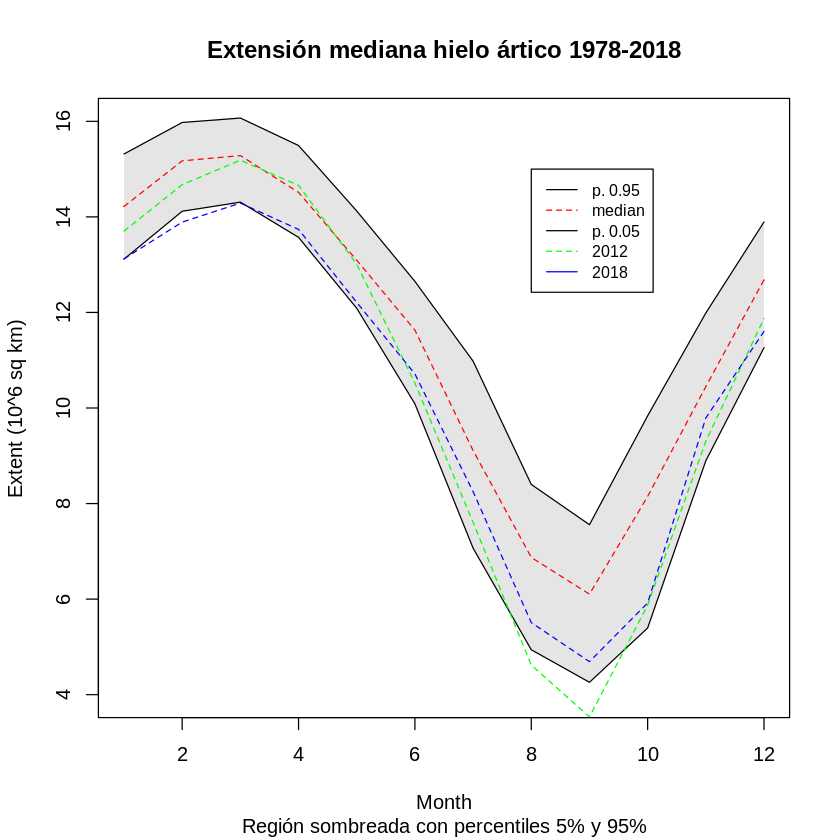

In [90]:
#::GMG::Finalmente pinto la gráfica que se pide
plot(ext.median, 
     type = 'l',
     xlim = c(1,12),
     ylim = c(floor(min(ext.percentil.5$Extent)), 
              round(max(ext.percentil.95$Extent))),
     xlab = 'Month',
     ylab = 'Extent (10^6 sq km)',
     col = 'darkred',
     main = 'Extensión mediana hielo ártico 1978-2018',
     sub = 'Región sombreada con percentiles 5% y 95%'
    )
polygon(c(ext.median$Month, rev(ext.median$Month)), 
        c(ext.percentil.95$Extent, rev(ext.percentil.5$Extent)), 
        col = "grey90", 
        border = FALSE
       )
lines(ext.median$Month, ext.percentil.95$Extent, col = "black")
lines(ext.median$Month, ext.median$Extent, col = "red", lty = 'dashed')
lines(ext.median$Month, ext.percentil.5$Extent, col = "black")
lines(ext.median.2012$Month, ext.median.2012$Extent, col = "green", lty = "dashed")
lines(ext.median.2018$Month, ext.median.2018$Extent, col = "blue",  lty = "dashed")
legend(8, 15, legend=c("p. 0.95", "median", "p. 0.05", "2012", "2018"),
       col=c("black","red","black", "green", "blue"), lty=1:2, cex=0.8)

vi) Comenta brevemente la gráfica.